## Download kaggle data in Google Colab

In [ ]:
# Peso (7.19 GB)
!kaggle datasets download -d anirudhcv/labeled-optical-coherence-tomography-oct

Dataset URL: https://www.kaggle.com/datasets/anirudhcv/labeled-optical-coherence-tomography-oct
License(s): unknown
100% 6.69G/6.70G [01:31<00:00, 79.0MB/s]
100% 6.70G/6.70G [01:31<00:00, 78.8MB/s]


In [ ]:
!unzip -q /content/labeled-optical-coherence-tomography-oct.zip -d /content
!rm /content/labeled-optical-coherence-tomography-oct.zip

## Import libraries

In [ ]:
import os
import random
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from skimage import exposure
from skimage.io import imread
import cv2

## Functions

In [ ]:
# Function to get a random image from each class directory
def get_random_image_from_class(directory, class_name):
    class_path = os.path.join(directory, class_name)
    image_file = random.choice(os.listdir(class_path))
    return os.path.join(class_path, image_file)

In [ ]:
# Function to get a random image from each class directory
def get_random_image_from_class(directory, class_name):
    class_path = os.path.join(directory, class_name)
    image_file = random.choice(os.listdir(class_path))
    return os.path.join(class_path, image_file)

In [ ]:
# Function to apply filters to an image
def apply_filters(image,sobel_ksize=5, sobel_dx=1, sobel_dy=1):
    # sobel_filtered = np.hypot(ndimage.sobel(image, axis=0), ndimage.sobel(image, axis=1))
    # Sobel filter with adjustable kernel size and derivative orders
    sobel_filtered_x = cv2.Sobel(image, cv2.CV_64F, sobel_dx, 0, ksize=sobel_ksize)
    sobel_filtered_y = cv2.Sobel(image, cv2.CV_64F, 0, sobel_dy, ksize=sobel_ksize)
    sobel_filtered = np.hypot(sobel_filtered_x, sobel_filtered_y)  # Combine x and y gradients

    gaussian_filtered = ndimage.gaussian_filter(image, sigma=2)
    equalized = exposure.equalize_hist(image)
    canny_filtered = cv2.Canny((image * 255).astype(np.uint8), 110, 220)  # Apply Canny filter
    return sobel_filtered, gaussian_filtered, equalized, canny_filtered

In [ ]:
# Function to plot 5x4 grid where each column is a class and each row is a filtered image
def plot_images_with_filters(classes, image_paths, title):
    fig, axes = plt.subplots(5, 4, figsize=(16, 20))  # 5 rows to include Canny filter
    fig.suptitle(title, fontsize=16)

    for col, (cls, img_path) in enumerate(zip(classes, image_paths)):
        img = imread(img_path, as_gray=True)

        # Apply filters
        sobel_filtered, gaussian_filtered, equalized, canny_filtered = apply_filters(img)

        # Original image (Row 1)
        axes[0, col].imshow(img, cmap='gray')
        axes[0, col].set_title(f"{cls} - Original")
        axes[0, col].axis('off')

        # Sobel filter (Edges) - Row 2
        axes[1, col].imshow(sobel_filtered, cmap='gray')
        axes[1, col].set_title(f"Sobel Filter")
        axes[1, col].axis('off')

        # Gaussian filter (Smoothing) - Row 3
        axes[2, col].imshow(gaussian_filtered, cmap='gray')
        axes[2, col].set_title(f"Gaussian Filter")
        axes[2, col].axis('off')

        # Histogram equalization (Contrast) - Row 4
        axes[3, col].imshow(equalized, cmap='gray')
        axes[3, col].set_title(f"Equalized (Contrast)")
        axes[3, col].axis('off')

        # Canny filter (Edges) - Row 5
        axes[4, col].imshow(canny_filtered, cmap='gray')
        axes[4, col].set_title(f"Canny Filter")
        axes[4, col].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## Preprocesado

In [ ]:
# Main Folder Path
folder_path = "/content/Dataset - train+val+test"

# SubFolder Paths
train_dir = f"{folder_path}/train"
val_dir = f"{folder_path}/val"
test_dir = f"{folder_path}/test"

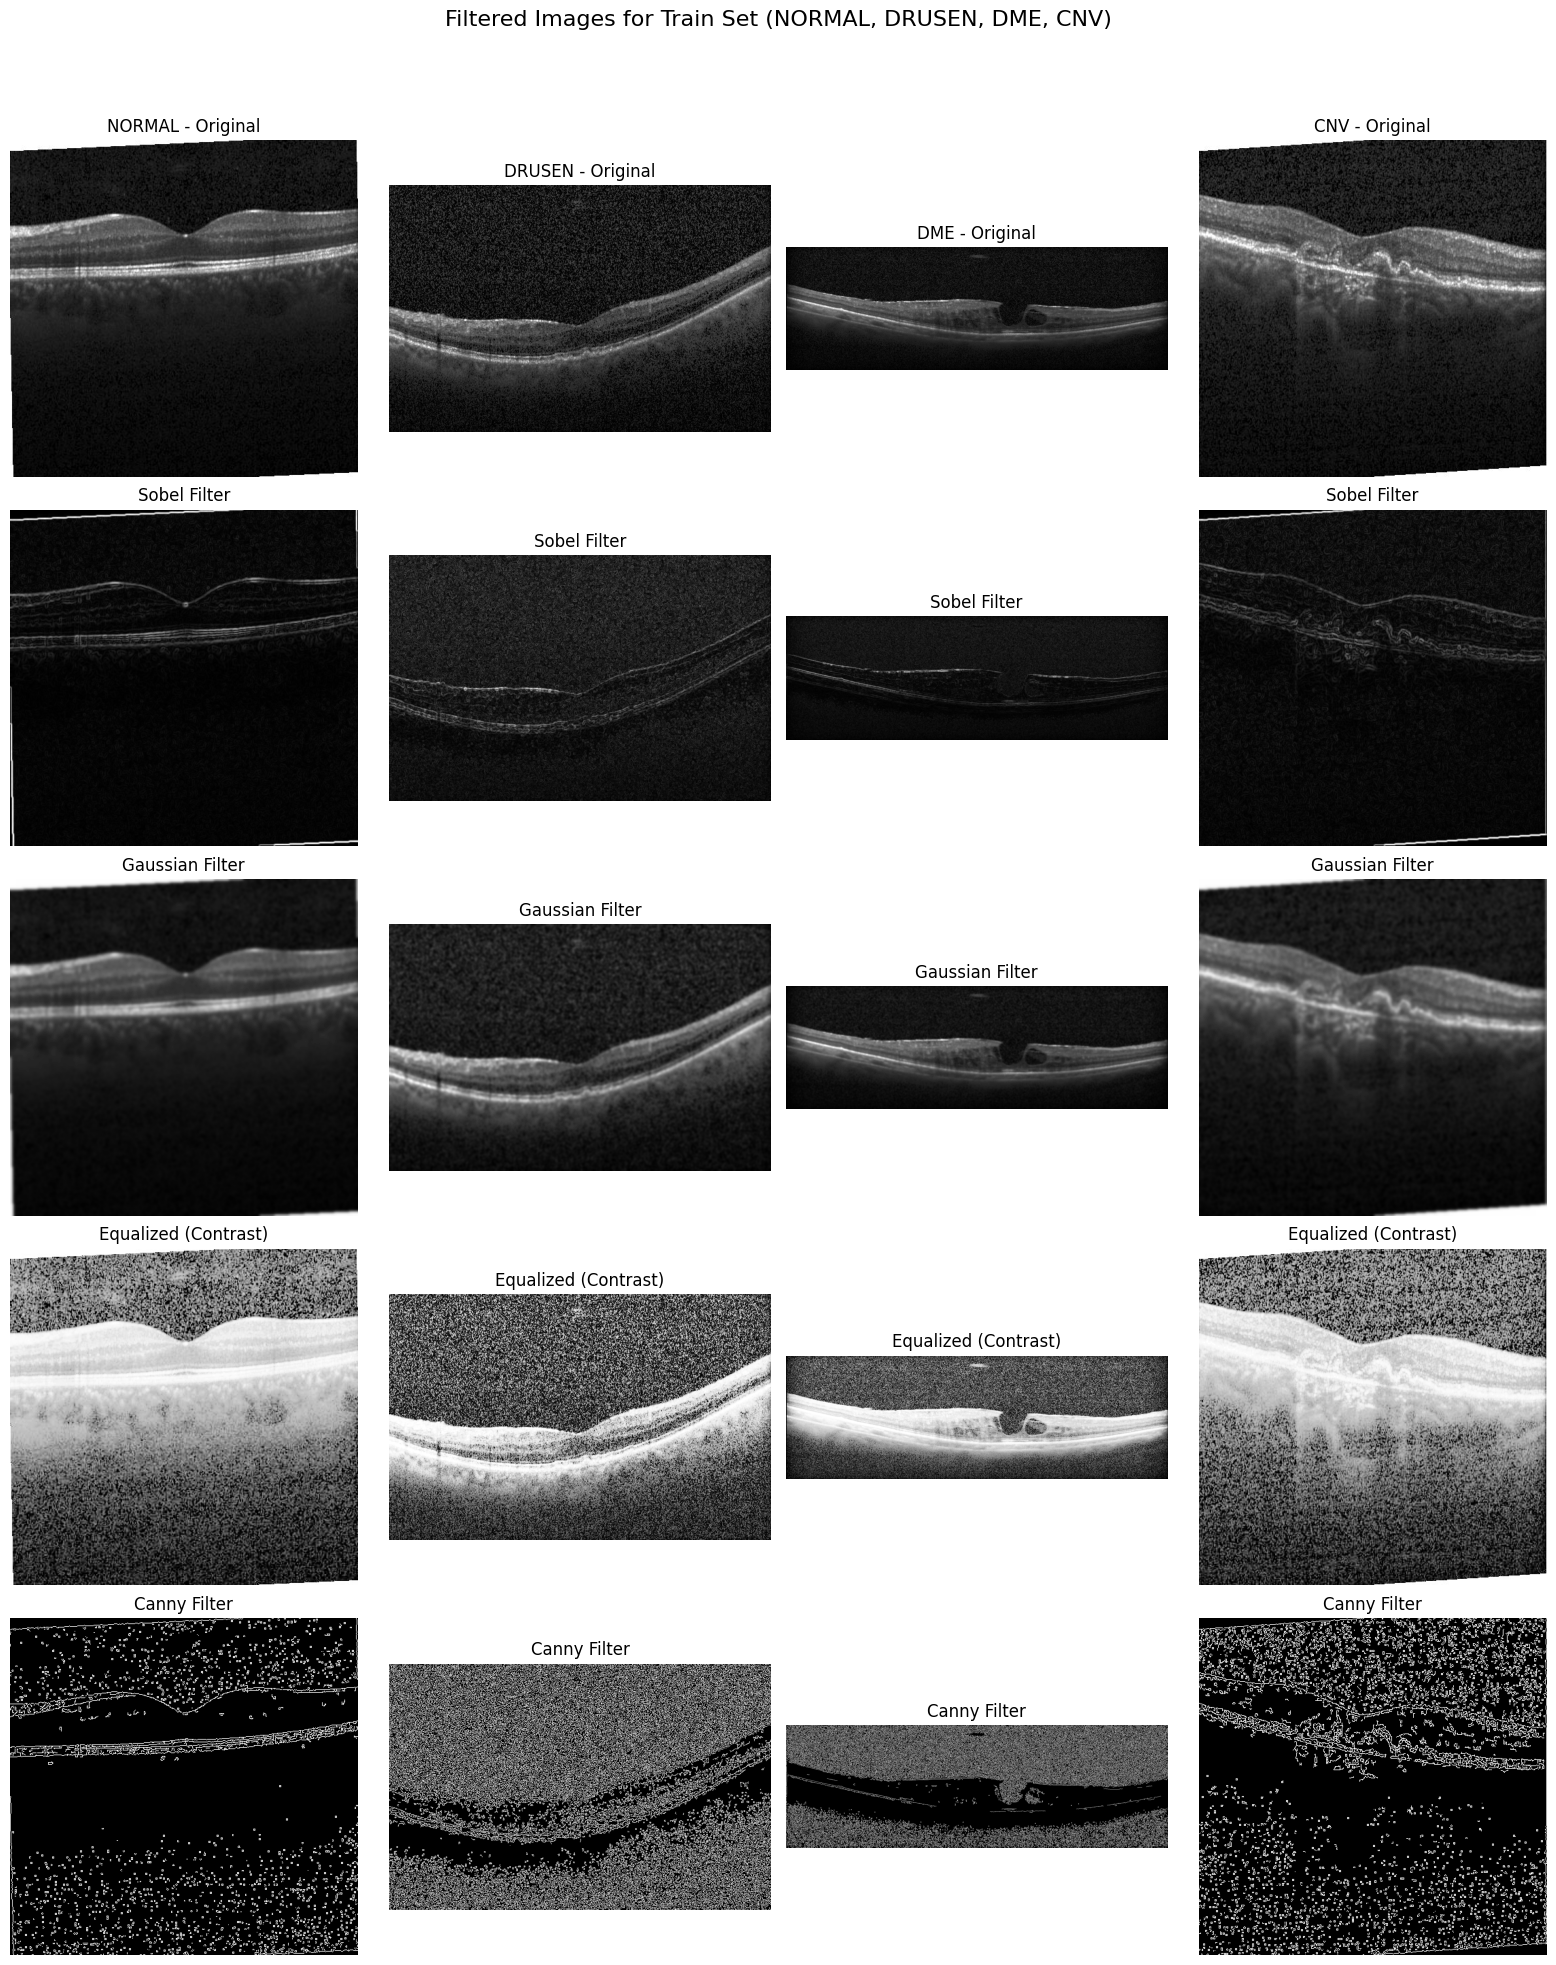

In [ ]:
# Classes
classes = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# Get one random image from each class for train
train_images = [get_random_image_from_class(train_dir, cls) for cls in classes]

# Plot the images with filters
plot_images_with_filters(classes, train_images, "Filtered Images for Train Set (NORMAL, DRUSEN, DME, CNV)")

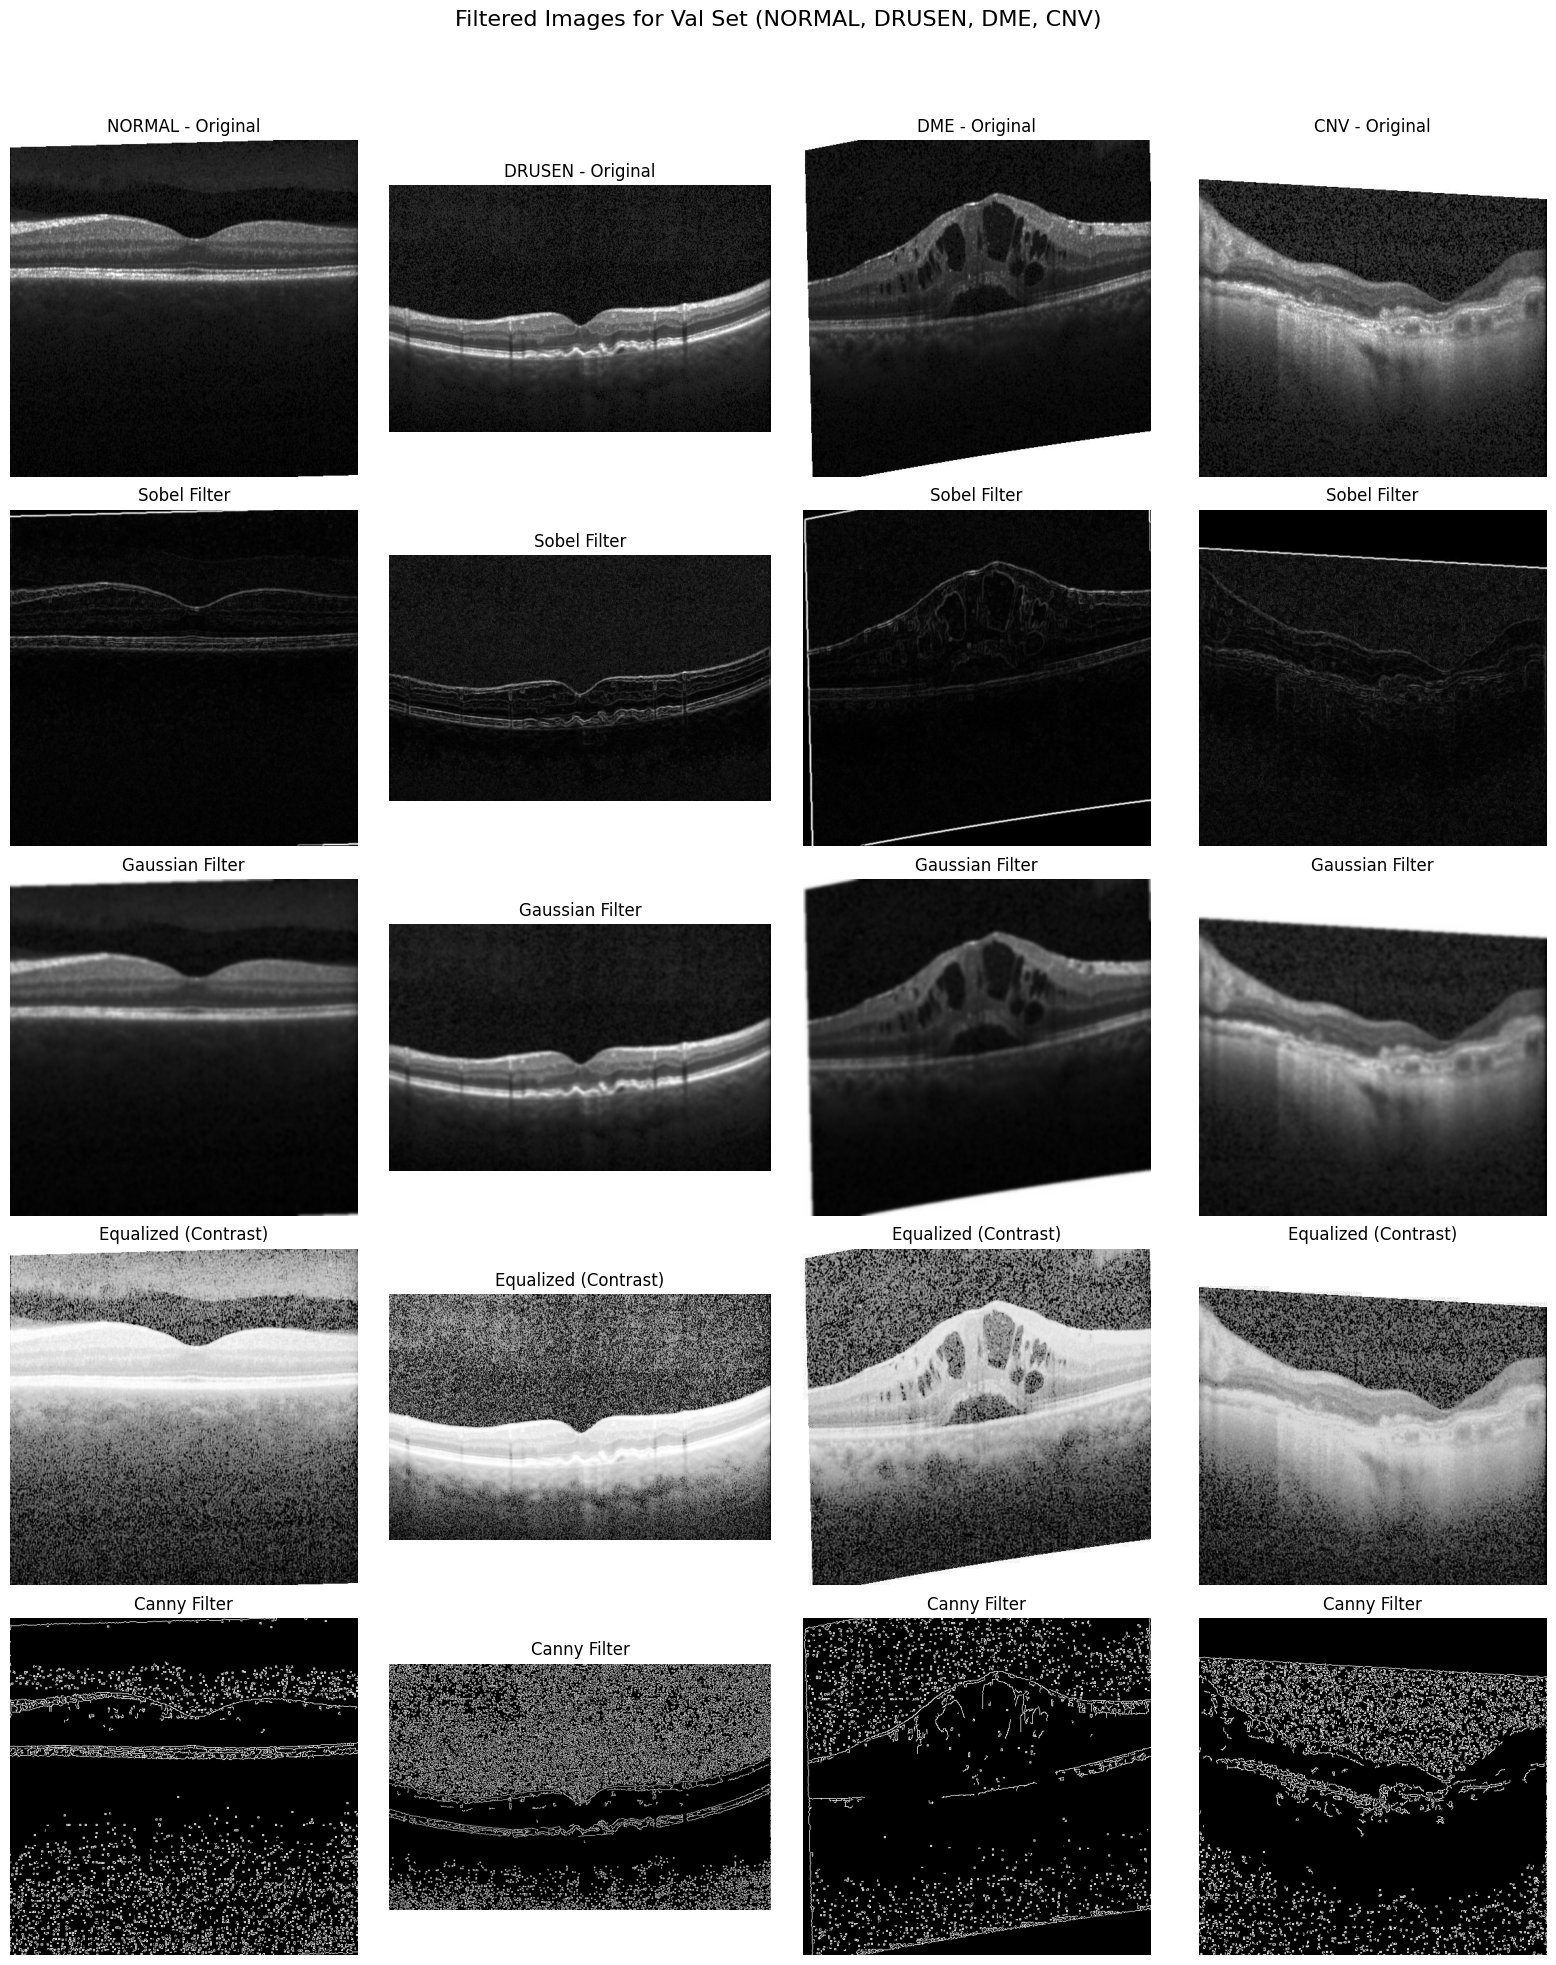

In [ ]:
# Classes
classes = ['NORMAL', 'DRUSEN', 'DME', 'CNV']

# Get one random image from each class for train
val_images = [get_random_image_from_class(val_dir, cls) for cls in classes]

# Plot the images with filters
plot_images_with_filters(classes, val_images, "Filtered Images for Val Set (NORMAL, DRUSEN, DME, CNV)")